In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df = pd.read_csv('life_SENZA_NaN.csv') 

In [20]:
df = df.drop('Unnamed: 0', axis=1)

In [21]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Russian Federation,2011,Developing,69.4,242.0,14,11.04,184.764931,97.0,629,...,97.0,6.61,97.0,0.3,14212.687000,14296868.0,2.3,2.4,0.785,14.0
1,Jordan,2007,Developing,73.0,12.0,4,0.60,373.262864,98.0,41,...,98.0,8.35,98.0,0.1,2762.863540,6193191.0,3.8,3.8,0.736,13.6
2,Tonga,2010,Developing,72.8,142.0,0,1.24,471.830767,82.0,0,...,84.0,4.59,82.0,0.1,3547.599750,14137.0,0.1,0.1,0.707,14.4
3,Panama,2006,Developing,76.2,125.0,1,5.72,631.125171,88.0,0,...,98.0,7.00,88.0,0.1,5348.518399,339195.0,2.1,2.0,0.744,12.9
4,Lebanon,2014,Developing,74.8,99.0,1,1.32,140.377136,81.0,112,...,75.0,6.39,81.0,0.1,8161.461400,563279.0,4.8,4.9,0.763,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,Georgia,2004,Developing,72.3,134.0,1,3.74,7.132565,64.0,6847,...,66.0,8.53,78.0,0.1,127.367228,4245.0,2.8,3.0,0.694,12.0
1393,Syrian Arab Republic,2002,Developing,72.8,135.0,9,1.25,91.703568,8.0,538,...,86.0,4.94,84.0,0.1,1263.134550,178791.0,6.6,6.5,0.596,10.2
1394,Kiribati,2011,Developing,65.5,26.0,0,0.53,30.467039,95.0,0,...,95.0,1.42,99.0,0.1,1692.613277,14656.0,0.1,0.1,0.585,11.9
1395,Brazil,2011,Developing,74.1,152.0,51,7.58,1084.999766,98.0,43,...,98.0,8.90,99.0,0.1,13167.472890,198686688.0,2.9,2.8,0.724,14.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22) 

In [24]:
### creare X_train e X_test selezionando solo le features 
features = ['Income composition of resources','Adult Mortality','HIV/AIDS','BMI','thinness  1-19 years','Alcohol'] 
X_train = train_df[features].copy()
X_test = test_df[features].copy()

In [25]:
y_train = train_df['Life expectancy'].copy()
y_test = test_df['Life expectancy'].copy()

In [26]:
def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:                 
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(np.arange(0,targets.max()), np.arange(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

TRAIN SET
MAE:  1.5635304799870398
R2:  0.943430102197876


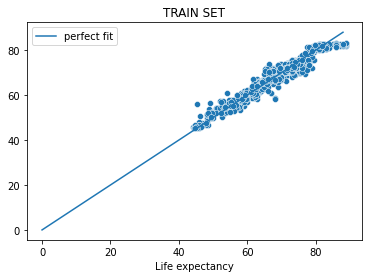

TEST SET
MAE:  1.8753942133282921
R2:  0.9050918507962087


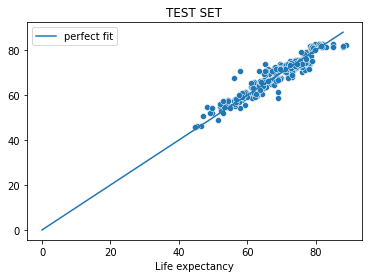

In [27]:
from sklearn.ensemble import RandomForestRegressor

### FITTING
model = RandomForestRegressor(random_state=22, max_depth=5)
model = model.fit(X=X_train, y=y_train)

### EVALUATION
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)


# usiamo la funzione che abbiamo definito prima
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

In [28]:
hold_out_df = pd.read_csv('life_hold_out.csv')

In [29]:
### predictions
X_hold_out = hold_out_df[features].copy()
new_predictions = model.predict(X_hold_out)

In [32]:
### salvataggio
new_predictions = pd.Series(new_predictions, index=hold_out_df.index)
new_predictions.to_csv('my_predictions.csv')

In [33]:
pd.read_csv('my_predictions.csv')

,Unnamed: 0,0
0,0,56.700534
1,1,71.702460
2,2,82.741363
3,3,78.389272
4,4,73.712847
...,...,...
247,247,80.872060
248,248,72.311062
249,249,58.356522
250,250,59.841088
